In [3]:
import zipfile
import os

zip_path = 'archive.zip'  
extract_path = 'archive'         


os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("archive extracted successfully!")


archive extracted successfully!


In [4]:
import os
for root, dirs, files in os.walk('archive'):
    for file in files:
        print(os.path.join(root, file))


archive\Testing\glioma\Te-glTr_0000.jpg
archive\Testing\glioma\Te-glTr_0001.jpg
archive\Testing\glioma\Te-glTr_0002.jpg
archive\Testing\glioma\Te-glTr_0003.jpg
archive\Testing\glioma\Te-glTr_0004.jpg
archive\Testing\glioma\Te-glTr_0005.jpg
archive\Testing\glioma\Te-glTr_0006.jpg
archive\Testing\glioma\Te-glTr_0007.jpg
archive\Testing\glioma\Te-glTr_0008.jpg
archive\Testing\glioma\Te-glTr_0009.jpg
archive\Testing\glioma\Te-gl_0010.jpg
archive\Testing\glioma\Te-gl_0011.jpg
archive\Testing\glioma\Te-gl_0012.jpg
archive\Testing\glioma\Te-gl_0013.jpg
archive\Testing\glioma\Te-gl_0014.jpg
archive\Testing\glioma\Te-gl_0015.jpg
archive\Testing\glioma\Te-gl_0016.jpg
archive\Testing\glioma\Te-gl_0017.jpg
archive\Testing\glioma\Te-gl_0018.jpg
archive\Testing\glioma\Te-gl_0019.jpg
archive\Testing\glioma\Te-gl_0020.jpg
archive\Testing\glioma\Te-gl_0021.jpg
archive\Testing\glioma\Te-gl_0022.jpg
archive\Testing\glioma\Te-gl_0023.jpg
archive\Testing\glioma\Te-gl_0024.jpg
archive\Testing\glioma\Te-gl_0

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'archive./Training'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)




Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [11]:
train_path = 'archive/Training'
test_path = 'archive/Testing'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])



In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.5282 - loss: 1.1913 - val_accuracy: 0.7826 - val_loss: 0.5570
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.8120 - loss: 0.5026 - val_accuracy: 0.8322 - val_loss: 0.4453
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8740 - loss: 0.3492 - val_accuracy: 0.8924 - val_loss: 0.2950
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8992 - loss: 0.2771 - val_accuracy: 0.8719 - val_loss: 0.3319
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9227 - loss: 0.2191 - val_accuracy: 0.9054 - val_loss: 0.2603
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9309 - loss: 0.1872 - val_accuracy: 0.9115 - val_loss: 0.2293
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9450 - loss: 0.1552 - val_accuracy: 0.9275 - val_loss: 0.1897
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9513 - loss: 0.1288 - val_accu

In [23]:
model.save('tumour_classifier_model.keras')


In [25]:
import numpy as np

preds = model.predict(test_generator)
predicted_classes = np.argmax(preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 326ms/step


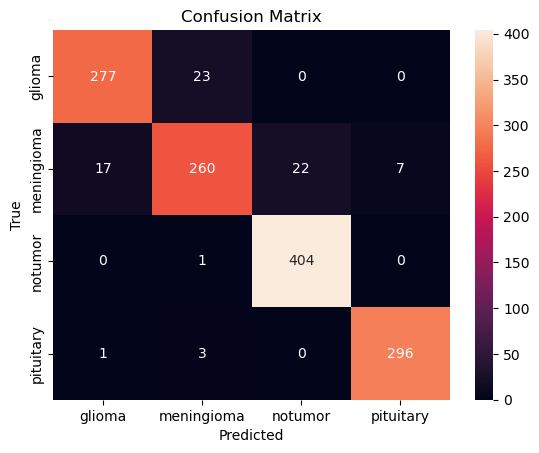

              precision    recall  f1-score   support

      glioma       0.94      0.92      0.93       300
  meningioma       0.91      0.85      0.88       306
     notumor       0.95      1.00      0.97       405
   pituitary       0.98      0.99      0.98       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=class_labels))
